In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("SampleLog.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(29, 5)

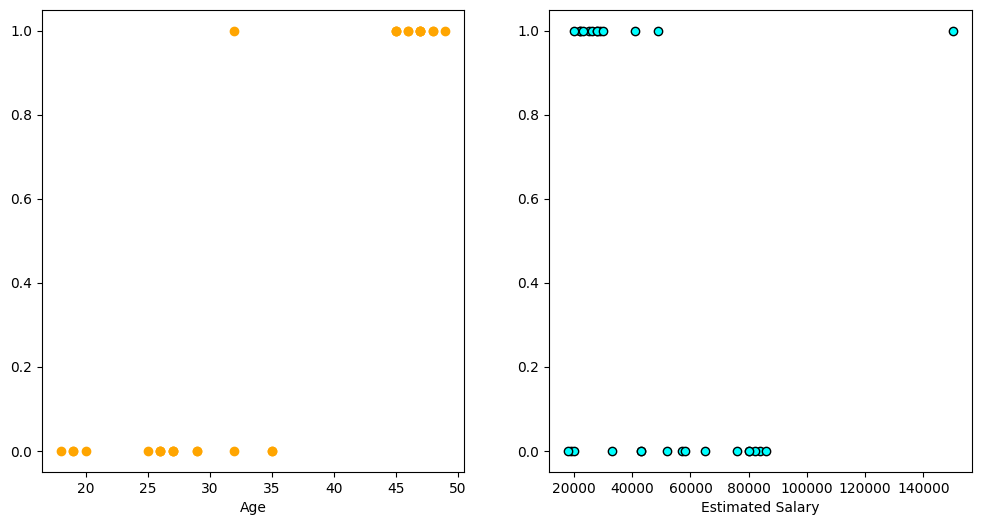

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(df.Age, df.Purchased, c='orange')
plt.xlabel('Age')

plt.subplot(122)
plt.scatter(df.EstimatedSalary, df.Purchased, c='cyan', edgecolor='k')
plt.xlabel('Estimated Salary')
plt.show()

In [5]:
df.groupby(by='Gender')['Purchased'].value_counts()

Gender  Purchased
Female  0             6
        1             5
Male    0            10
        1             8
Name: count, dtype: int64

In [6]:
model = LogisticRegression()
model.fit(df[['Age']], df['Purchased'])

LogisticRegression()

In [7]:
model.predict([[27]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [8]:
model.predict([[57]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

.

.

.

##What is overfitting?
When the model performs well in training, but poorly in testing

##What is underfitting?
Model performs poorly in both, training and testing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df2 = df

In [11]:
x = df2[['Age']]
y = df2['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=24)

In [12]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0])

In [ ]:
accuracy_score(y_test, y_pred)

In [17]:
y_predt = model2.predict(x_train)
y_predt

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0])

In [18]:
accuracy_score(y_train, y_predt)

0.9565217391304348

In [19]:
score = cross_val_score(model, x, y, cv=5)
score

array([0.83333333, 1.        , 1.        , 1.        , 1.        ])

In [20]:
score = cross_val_score(model, x, y, cv=5)
score.mean()

0.9666666666666668